# A/B testing on marketing calls with/without screenshare feature - Online travel portal
We recently introduced a new feature that helps the market management team share their screen with the clients during a phone conversation, in an effort to increase the number of products actioned by partner clients. One third of the employees were selected randomly to test the feature, while the remaining 2/3 were not granted access.

- A) How would you assess the benefits of the screenshare feature ?
- B) Using the raw data, are you able to validate your hypothesis ?
- C) What conclusion can you draw on the feature's impact ? Would you recommend a full-scale implementation ?

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load Smart City data 2021
df = pd.read_excel('2022-02-02 Recruitment Case -ScreenShare V2_data.xlsx')
print('Number of observations:', len(df), '\n')
df.head()

Number of observations: 781 



,month_key,cohort,super_region_name,employee_id,call_duration_minute,nb_calls,nb_pitch,nb_wins
0,2021-07-01,group1,AMER,6273,13.97,188,91,78
1,2021-08-01,group1,AMER,6273,14.30,250,101,82
2,2021-09-01,group1,AMER,6273,5.72,322,143,108
3,2021-10-01,group1,AMER,6273,10.34,522,164,77
4,2021-05-01,group2,APAC,34015,22.60,350,267,127


In [3]:
# Data quality checks
df.info()
print('\n') 
print('Number of missing values per variable:', '\n') 
print(df.isnull().sum(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   month_key             781 non-null    datetime64[ns]
 1   cohort                781 non-null    object        
 2   super_region_name     781 non-null    object        
 3   employee_id           781 non-null    int64         
 4   call_duration_minute  781 non-null    float64       
 5   nb_calls              781 non-null    int64         
 6   nb_pitch              781 non-null    int64         
 7   nb_wins               781 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 48.9+ KB


Number of missing values per variable: 

month_key               0
cohort                  0
super_region_name       0
employee_id             0
call_duration_minute    0
nb_calls                0
nb_pitch                0
nb_wins  

In [4]:
# Group 2 - no feature / group 1- feature 
df['cohort'].value_counts()

group2    520
group1    261
Name: cohort, dtype: int64

In [5]:
# Create performance metrics
df['success_rate'] = df['nb_wins']/df['nb_pitch']
df['success_rate_call'] = df['nb_wins']/df['nb_calls']

In [6]:
# Basic stats
df.describe()

,employee_id,call_duration_minute,nb_calls,nb_pitch,nb_wins,success_rate,success_rate_call
count,781.000000,781.000000,781.000000,781.000000,781.000000,780.000000,781.000000
mean,129632.257362,15.199744,331.209987,174.133163,73.257362,0.383898,0.216004
std,98709.020897,5.846389,189.236636,86.628918,49.787616,0.191354,0.126128
min,6273.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,74484.000000,10.200000,229.000000,125.000000,40.000000,0.264586,0.127193
50%,84979.000000,15.200000,339.000000,192.000000,69.000000,0.372410,0.198113
75%,96939.000000,20.100000,433.000000,237.000000,103.000000,0.500000,0.288732
max,316756.000000,27.390000,1205.000000,373.000000,294.000000,1.000000,0.720000


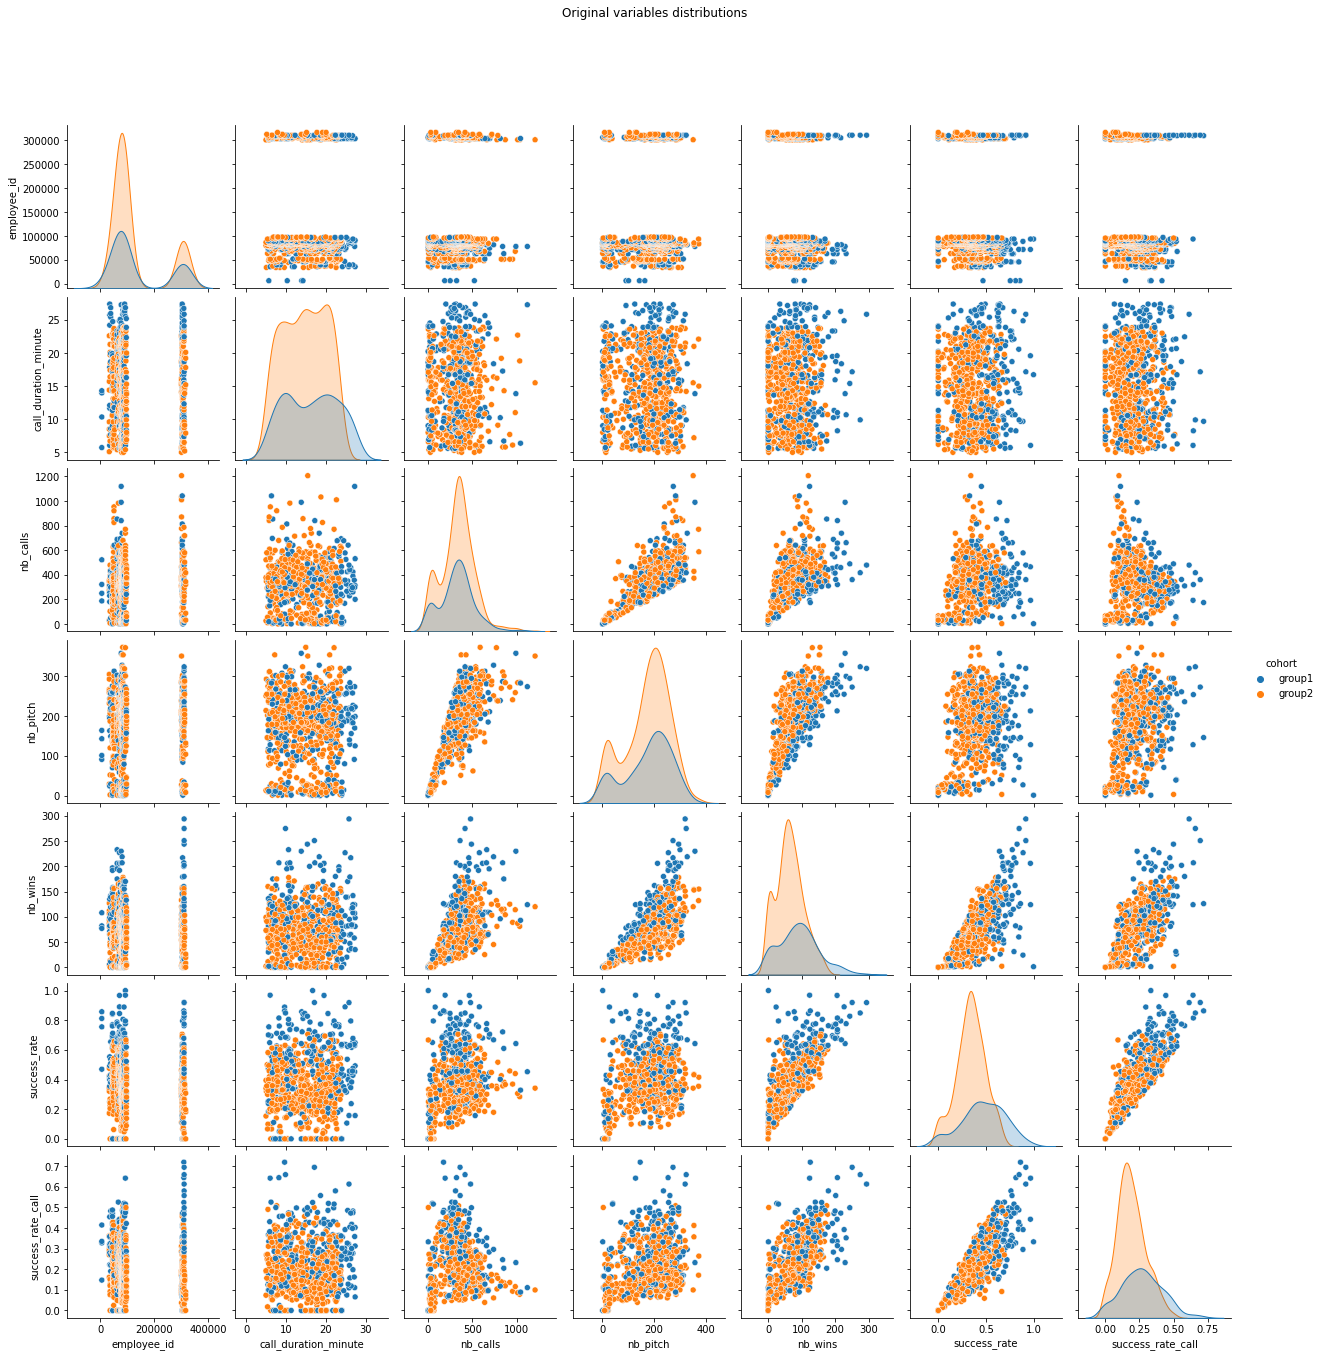

In [7]:
# Check variables distributions
ax = sns.pairplot(df, hue='cohort')
ax.fig.suptitle("Original variables distributions", y=1.08)
plt.show()

In [26]:
# Averages
df.groupby('cohort').mean()

,employee_id,call_duration_minute,nb_calls,nb_pitch,nb_wins,success_rate,success_rate_call
cohort,,,,,,,
group1,136937.057471,16.301916,326.459770,175.310345,90.908046,0.472059,0.268091
group2,125965.809615,14.646538,333.594231,173.542308,64.398077,0.339817,0.189861


## A/B test on success rate (i.e., t-test)
- The t-test shows that the difference in the average success rate of calls with/without screen-sharing feature is statistically significant at 99%.
- Using a screen-sharing feature in marketing calls with clients therefore increases by 8% the chance of successfully placing a product compared to calls that do not use this feature.

In [ ]:
import scipy.stats as stats

# Perform two-sided Mann-Whitney U rank test
print('Difference in loggedIn/anonymous average number of clicks:', '\n',
      stats.ttest_ind(df['success_rate'][df['cohort'] == 'group1'], df['success_rate'][df['cohort'] == 'group2']), '\n')